## MFDFA of PSP Sub and Super Alfvenic Intervals

In [16]:
# First we need to import the necessary libraries. 
# Pyspedas handles loading the data, while MFDFA handles fluctuation function calculation
import pyspedas
import matplotlib.pyplot as plt
import numpy as np
from pytplot import tplot
import MFDFAlib
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import pacf

### Loading the Sub-Alfvenic and Super-Alfvenic Regions: 

23-Apr-25 11:24:56: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/psp/fields/l2/mag_rtn/2021/
23-Apr-25 11:24:57: File is current: psp_data/fields/l2/mag_rtn/2021/psp_fld_l2_mag_rtn_2021042918_v02.cdf
23-Apr-25 11:24:57: File is current: psp_data/fields/l2/mag_rtn/2021/psp_fld_l2_mag_rtn_2021043000_v02.cdf
23-Apr-25 11:25:03: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/psp/fields/l2/mag_rtn/2021/
23-Apr-25 11:25:04: File is current: psp_data/fields/l2/mag_rtn/2021/psp_fld_l2_mag_rtn_2021042918_v02.cdf
23-Apr-25 11:25:04: File is current: psp_data/fields/l2/mag_rtn/2021/psp_fld_l2_mag_rtn_2021043000_v02.cdf


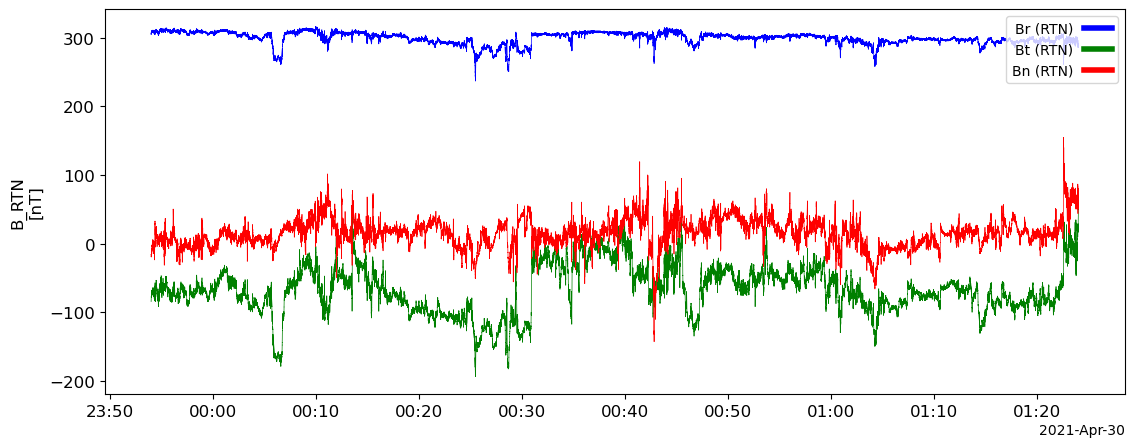

23-Apr-25 11:25:09: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/psp/fields/l2/mag_rtn/2021/
23-Apr-25 11:25:10: File is current: psp_data/fields/l2/mag_rtn/2021/psp_fld_l2_mag_rtn_2021043000_v02.cdf
23-Apr-25 11:25:13: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/psp/fields/l2/mag_rtn/2021/
23-Apr-25 11:25:13: File is current: psp_data/fields/l2/mag_rtn/2021/psp_fld_l2_mag_rtn_2021043000_v02.cdf


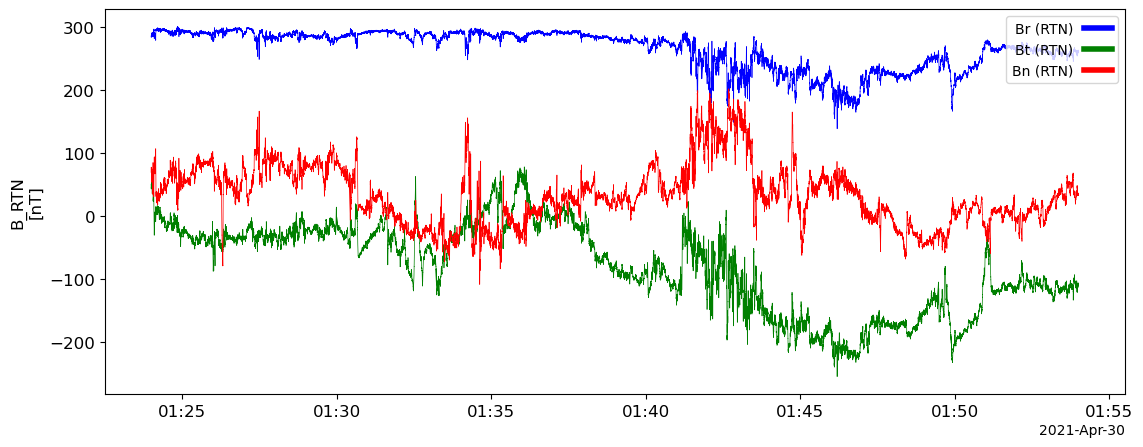

In [17]:
# First let's load the sub-Alfvenic time range
# Ranges taken from https://arxiv.org/pdf/2201.10718 Section 3
subAlfTimeRange = ['2021-4-29/23:54','2021-4-30/01:24']

# Here we set the environment variable for the specified time range of the PSP data:
fields_vars = pyspedas.projects.psp.fields(trange=subAlfTimeRange, datatype='mag_rtn', level='l2', time_clip=True)

# Here we extract the RTN coordinate B-field data for PSP:
b_rtn_subAlf = pyspedas.get_data("psp_fld_l2_mag_RTN")

# Here we calculate the magnitude of the B-field data: 
bmag_sub = MFDFAlib.magnitude(b_rtn_subAlf.y)

# Here we plot the data to make sure everything looks proper
tplot('psp_fld_l2_mag_RTN')

# Finally, we perform the multifractal analysis using the MFDFA library:
# This will give us the Renyi spectrum, Hurst spectrum, fluctuation function, and singularity spectrum
# MFDFA = MFDFAlib.MFDFA_analysis(bmag_sub)

# Now let's choose the corresponding super-Alfvenic time range
superAlfTimeRange = ['2021-4-30/01:24','2021-4-30/01:54']

# Here we set the environment variable for the specified time range of the PSP data:
fields_vars = pyspedas.projects.psp.fields(trange=superAlfTimeRange, datatype='mag_rtn', level='l2', time_clip=True)

# Here we extract the RTN coordinate B-field data for PSP:
b_rtn_superAlf = pyspedas.get_data("psp_fld_l2_mag_RTN")

# Here we calculate the magnitude of the B-field data: 
bmag_super = MFDFAlib.magnitude(b_rtn_superAlf.y)

# Here we plot the data to make sure everything looks proper
tplot('psp_fld_l2_mag_RTN')

sub_label = 'Sub-Alfvenic Interval (April 29th-30th, 2021 from 23:54-01:24 UTC)'
super_label = 'Super-Alfvenic Interval (April 30th, 2021 from 01:24-01:54 UTC)'

# Finally, we perform the multifractal analysis using the MFDFA library:
# This will give us the Renyi spectrum, Hurst spectrum, fluctuation function, and singularity spectrum
# MFDFAb = MFDFAlib.MFDFA_analysis(bmag_sub, bmag_super, sub_label, super_label)

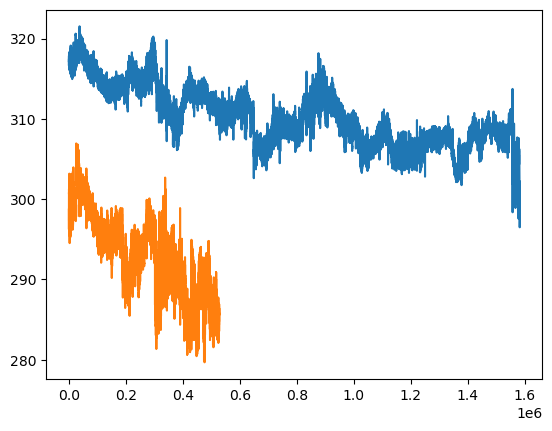

In [18]:
# Plot the magnitude data
plt.plot(bmag_sub)
plt.plot(bmag_super)

#### Initiating Lags and q Powers 

In [19]:
# We first need to select a band of lags, varying from small segments of data to long ones:
# These bands must be integers, since they will segment the data into chunks of side length s:
lag1 = np.arange(2,len(bmag_sub)//2,10)
lag2 = np.arange(2,len(bmag_super)//2,10)
#lag1 = np.unique(np.logspace(np.log10(1),np.log10(len(bmag_sub)),100000, dtype = int))
#lag2 = np.unique(np.logspace(np.log10(1),np.log10(len(bmag_super)),100000, dtype = int))
#print(lag1)
# We need to select a range of powers for the fluctuation function.
# Gomes et al. do -20 to 20 with increments of 0.25
qList=np.arange(-20,20,0.25).tolist()
qList.remove(0)

#The order for the polynomial fitting is chosen by Gomes et al. as 3:
order = 2

#### Autocorrelation Function :

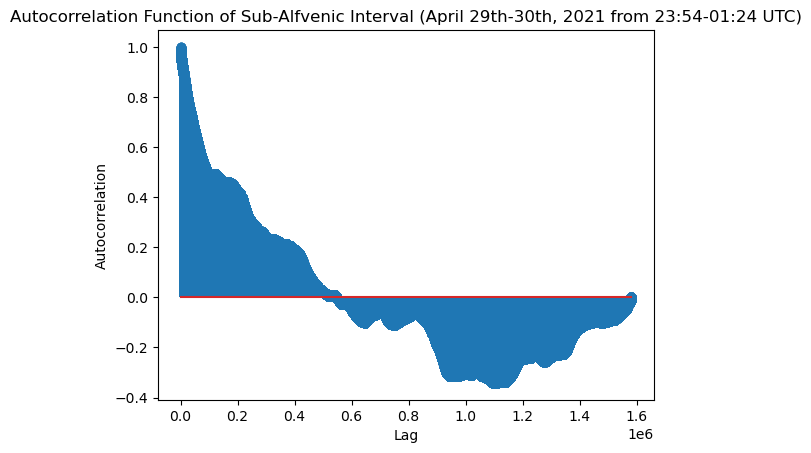

In [20]:
# Calculate the autocorrelation function using statsmodels library
acf = sm.tsa.acf(bmag_sub, nlags = len(bmag_sub))
plt.stem(range(len(acf)), acf)
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.title(f"Autocorrelation Function of {sub_label}")
plt.show()


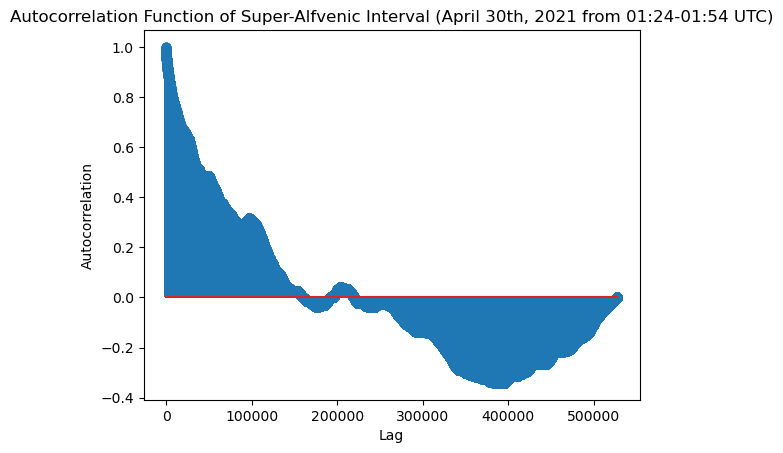

In [21]:
# Calculate the autocorrelation function using statsmodels library
acf = sm.tsa.acf(bmag_super, nlags = len(bmag_super))
plt.stem(range(len(acf)), acf)
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.title(f"Autocorrelation Function of {super_label}")
plt.show()

#### Fluctuation Function

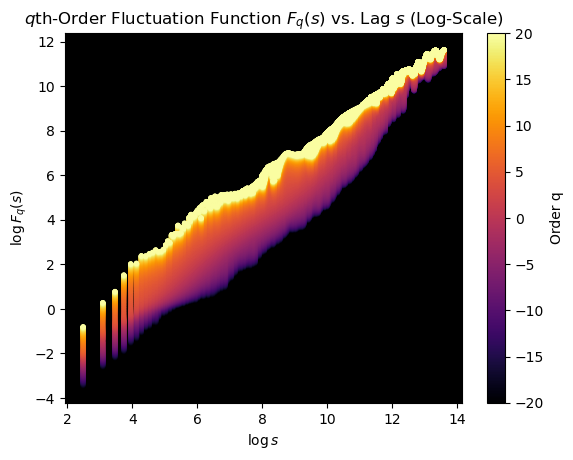

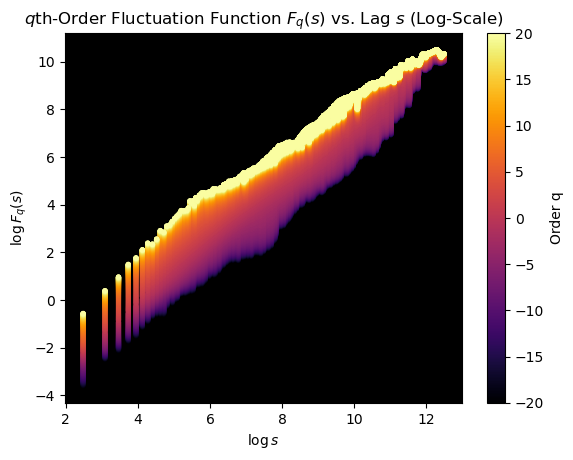

In [22]:
# Find the fluctuation function:
lag1,dfaList1 = MFDFAlib.flucFunc(bmag_sub,lag1,qList,order)
lag2,dfaList2 = MFDFAlib.flucFunc(bmag_super,lag2,qList,order)


#### Hurst Parameter Spectrum

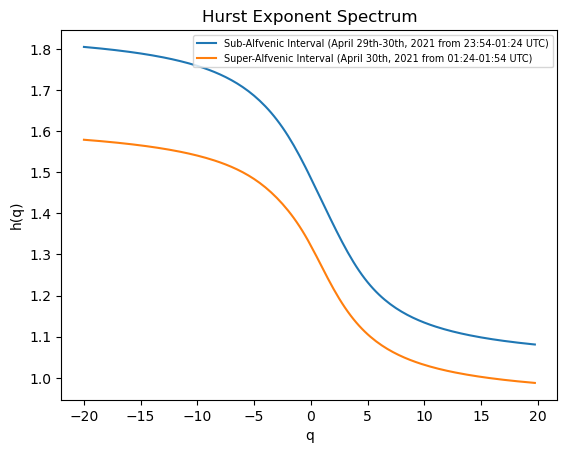

In [23]:
"""
 Hurst parameter spectra from each fluctuation function:
 Note : hList takes in the transpose of the fluctuation matrix,
 which is of the form: [[F_q1(s1),F_q1(s2), ...], [F_q2(s1),F_q2(s2), ...]]
 for the purpose of easily parsing the data  
"""
h1=MFDFAlib.hList(lag1,dfaList1.T)
h2=MFDFAlib.hList(lag2,dfaList2.T)
########PLOTTING#################
plt.plot(qList,h1,label=sub_label)
plt.plot(qList,h2,label=super_label)
plt.ylabel('h(q)')
plt.xlabel('q')
plt.legend(fontsize = 'x-small')
plt.title('Hurst Exponent Spectrum')
plt.show()
#################################

#### Renyi Exponent Spectrum

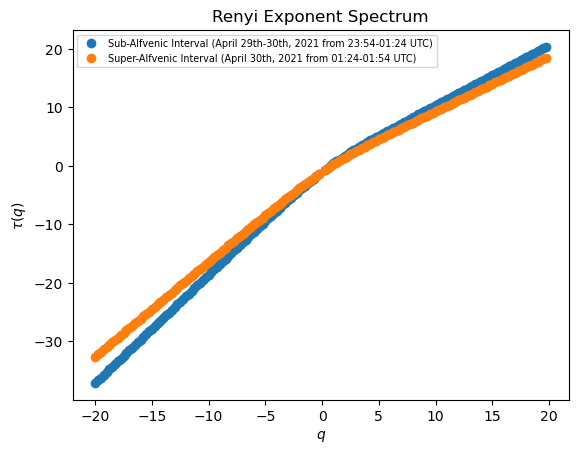

In [24]:
# Now find and plot the Renyi exponent spectrum from the Hurst spectrum:
tauFunc1=MFDFAlib.renyiExp(qList,h1)
tauFunc2=MFDFAlib.renyiExp(qList,h2)
########PLOTTING#################
plt.plot(qList,tauFunc1,'o',label = sub_label)
plt.plot(qList,tauFunc2,'o', label = super_label)
plt.xlabel(r'$q$')
plt.ylabel(r'$\tau(q)$')
plt.legend(fontsize = 'x-small')
plt.title('Renyi Exponent Spectrum')
plt.show()
#################################

#### Multifractal Spectrum

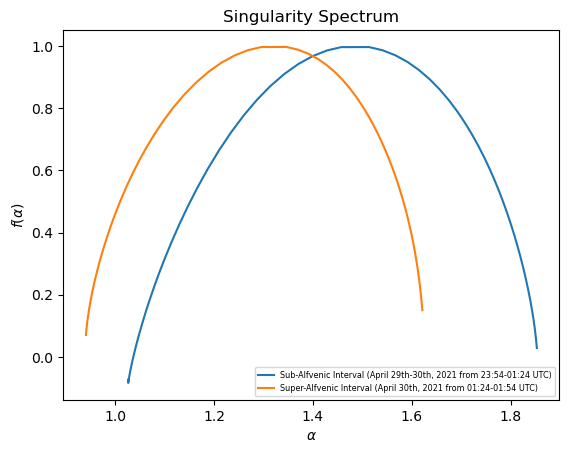

In [25]:
# Finally, from the Renyi exponents, find and plot the multifractal spectra:
alphaList1, mfList1 = MFDFAlib.mfSpec(tauFunc1, qList)
alphaList2, mfList2 = MFDFAlib.mfSpec(tauFunc2, qList)
#######PLOTTING##################
# Finally, plot the f(alpha) function
plt.plot(alphaList1, mfList1, label = sub_label)
plt.plot(alphaList2, mfList2, label = super_label)
plt.title('Singularity Spectrum')
plt.legend(fontsize = "xx-small")
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$f(\alpha)$')
plt.show()
#################################

#### Power Spectral Density

Text(0, 0.5, 'Power Spectral Density [nt**2/Hz]')

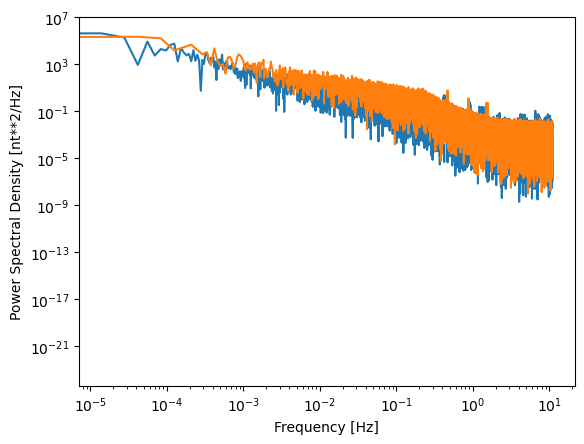

In [26]:
# Here we are calculating the PSD function of each data set:
# Choose 22 Hz as the sampling frequency, as in Gomes et al.
fs = 22 # Hz
fList1, PSDlist1 = MFDFAlib.PSDfunc(bmag_sub,fs)
fList2, PSDlist2 = MFDFAlib.PSDfunc(bmag_super,fs)
#######PLOTTING###################
plt.loglog(fList1,PSDlist1, label = sub_label)
plt.loglog(fList2,PSDlist2, label = super_label)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power Spectral Density [nt**2/Hz]')
##################################

### Shuffled Data

In [27]:
# First we use MFDFAlib to shuffle our time series intervals:
shuffled_sub = MFDFAlib.shuffle(bmag_sub)
shuffled_super = MFDFAlib.shuffle(bmag_super)


#### Fluctuation Function (Shuffled)

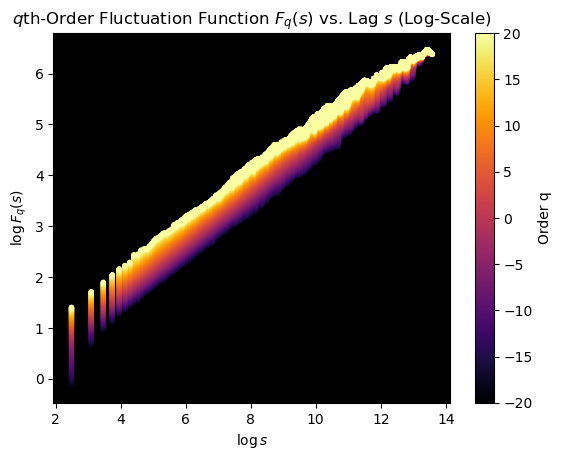

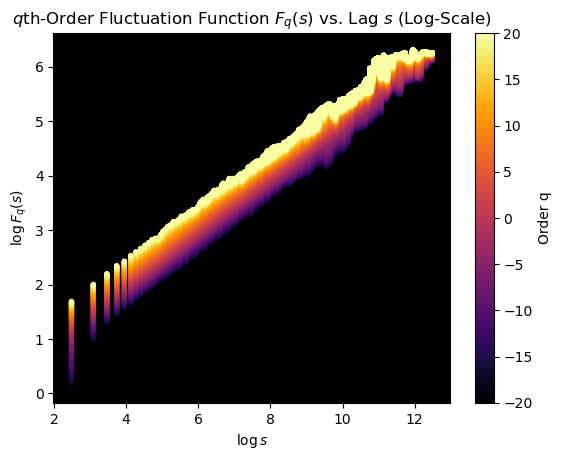

In [28]:
# Find the fluctuation function:
lag1,dfaList_shuf1 = MFDFAlib.flucFunc(shuffled_sub,lag1,qList,order)
lag2,dfaList_shuf2 = MFDFAlib.flucFunc(shuffled_super,lag2,qList,order)

#### Hurst Spectrum (Shuffled)

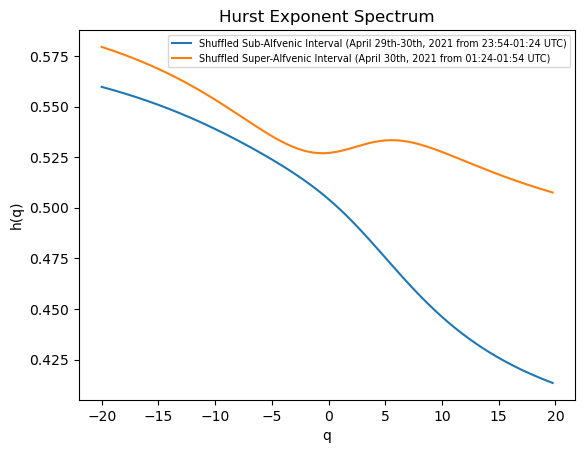

In [29]:
"""
 Hurst parameter spectra from each fluctuation function:
 Note : hList takes in the transpose of the fluctuation matrix,
 which is of the form: [[F_q1(s1),F_q1(s2), ...], [F_q2(s1),F_q2(s2), ...]]
 for the purpose of easily parsing the data  
"""
h_shuf1=MFDFAlib.hList(lag1,dfaList_shuf1.T)
h_shuf2=MFDFAlib.hList(lag2,dfaList_shuf2.T)
########PLOTTING#################
plt.plot(qList,h_shuf1,label=f"Shuffled {sub_label}")
plt.plot(qList,h_shuf2,label=f"Shuffled {super_label}")
plt.ylabel('h(q)')
plt.xlabel('q')
plt.legend(fontsize = 'x-small')
plt.title('Hurst Exponent Spectrum')
plt.show()
#################################

#### Renyi Exponent Spectrum (Shuffled)

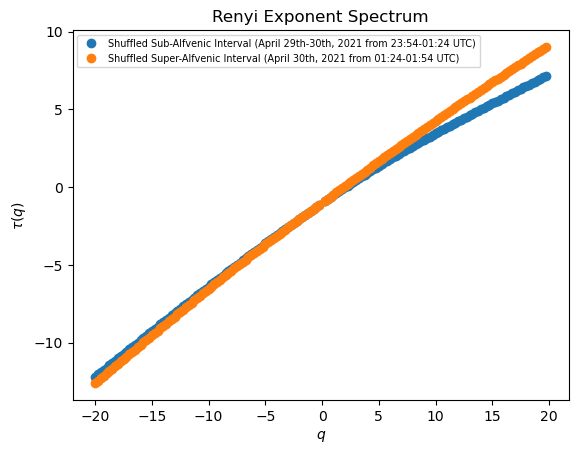

In [30]:
# Now find and plot the Renyi exponent spectrum from the Hurst spectrum:
tauFunc_shuf1=MFDFAlib.renyiExp(qList,h_shuf1)
tauFunc_shuf2=MFDFAlib.renyiExp(qList,h_shuf2)
########PLOTTING#################
plt.plot(qList,tauFunc_shuf1,'o',label = f'Shuffled {sub_label}')
plt.plot(qList,tauFunc_shuf2,'o', label = f'Shuffled {super_label}')
plt.xlabel(r'$q$')
plt.ylabel(r'$\tau(q)$')
plt.legend(fontsize = 'x-small')
plt.title('Renyi Exponent Spectrum')
plt.show()
#################################

#### Multifractal Spectrum (Shuffled)

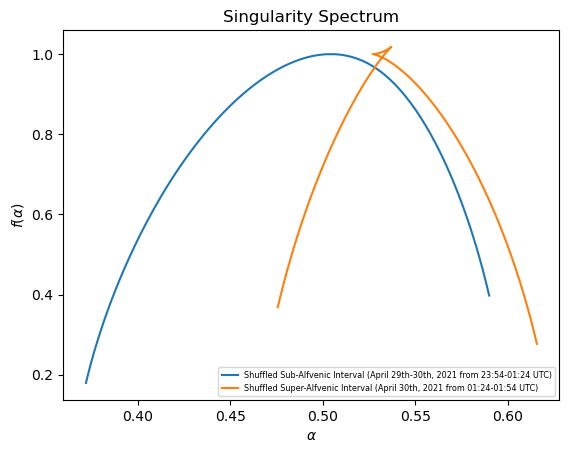

In [31]:
# Finally, from the Renyi exponents, find and plot the multifractal spectra:
alphaList_shuf1, mfList_shuf1 = MFDFAlib.mfSpec(tauFunc_shuf1, qList)
alphaList_shuf2, mfList_shuf2 = MFDFAlib.mfSpec(tauFunc_shuf2, qList)
#######PLOTTING##################
# Finally, plot the f(alpha) function
plt.plot(alphaList_shuf1, mfList_shuf1, label = f'Shuffled {sub_label}')
plt.plot(alphaList_shuf2, mfList_shuf2, label = f'Shuffled {super_label}')
plt.title('Singularity Spectrum')
plt.legend(fontsize = "xx-small")
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$f(\alpha)$')
plt.show()
#################################

#### Power Spectral Density (Shuffled)

Text(0, 0.5, 'Power Spectral Density [nt**2/Hz]')

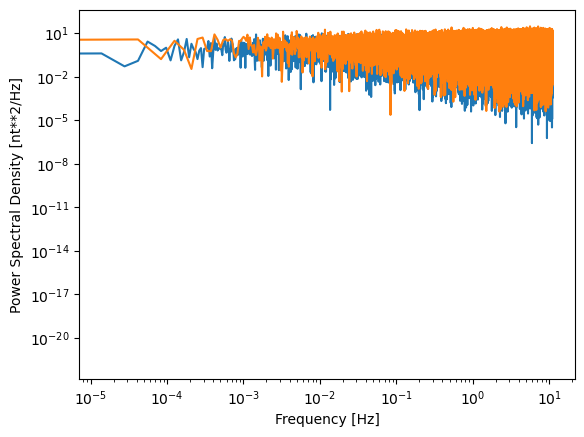

In [32]:
# Here we are calculating the PSD function of each data set:
# Choose 22 Hz as the sampling frequency, as in Gomes et al.
fs = 22 # Hz
fList_shuf1, PSDlist_shuf1 = MFDFAlib.PSDfunc(shuffled_sub,fs)
fList_shuf2, PSDlist_shuf2 = MFDFAlib.PSDfunc(shuffled_super,fs)
#######PLOTTING###################
plt.loglog(fList_shuf1,PSDlist_shuf1, label = f'Shuffled {sub_label}')
plt.loglog(fList_shuf2,PSDlist_shuf2, label = f'Shuffled {super_label}')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power Spectral Density [nt**2/Hz]')
##################################

## Phase-Shuffled Data

In [33]:
# First we use MFDFAlib to shuffle our time series phases:
phaseShuffled_sub = MFDFAlib.phaseShuffle(bmag_sub)
phaseShuffled_super = MFDFAlib.phaseShuffle(bmag_super)

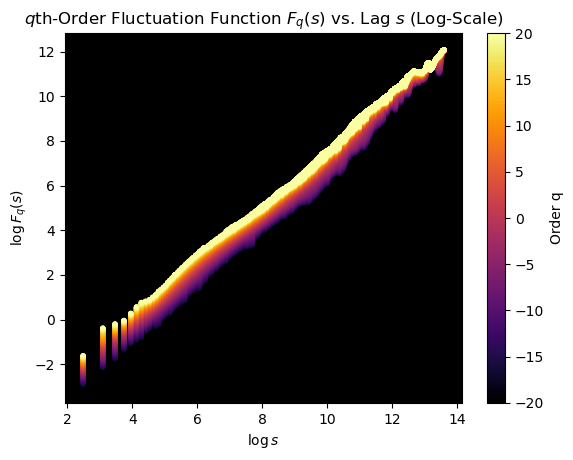

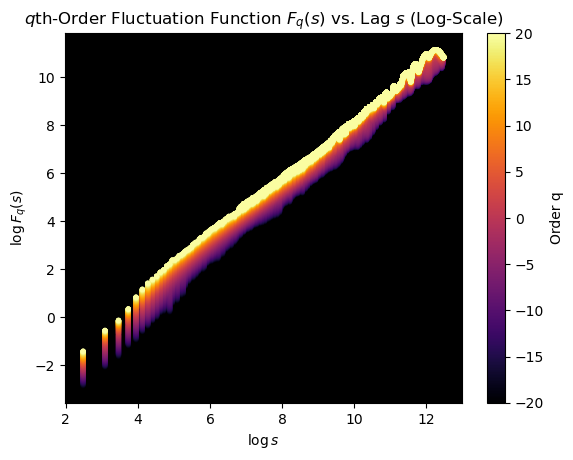

In [34]:
# Find the fluctuation function:
lag1,dfaList_pshuf1 = MFDFAlib.flucFunc(phaseShuffled_sub,lag1,qList,order)
lag2,dfaList_pshuf2 = MFDFAlib.flucFunc(phaseShuffled_super,lag2,qList,order)

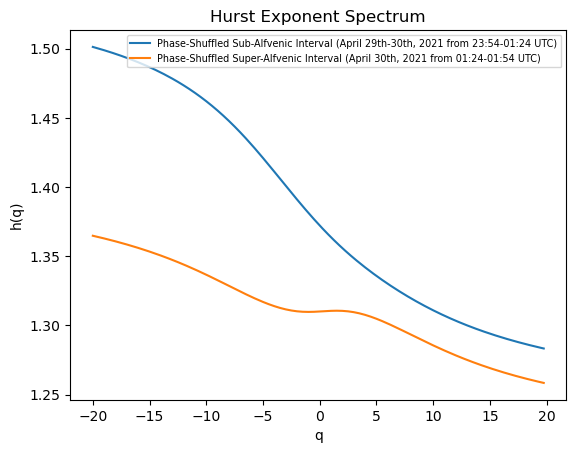

In [35]:
"""
 Hurst parameter spectra from each fluctuation function:
 Note : hList takes in the transpose of the fluctuation matrix,
 which is of the form: [[F_q1(s1),F_q1(s2), ...], [F_q2(s1),F_q2(s2), ...]]
 for the purpose of easily parsing the data  
"""
h_pshuf1=MFDFAlib.hList(lag1,dfaList_pshuf1.T)
h_pshuf2=MFDFAlib.hList(lag2,dfaList_pshuf2.T)
########PLOTTING#################
plt.plot(qList,h_pshuf1,label=f"Phase-Shuffled {sub_label}")
plt.plot(qList,h_pshuf2,label=f"Phase-Shuffled {super_label}")
plt.ylabel('h(q)')
plt.xlabel('q')
plt.legend(fontsize = 'x-small')
plt.title('Hurst Exponent Spectrum')
plt.show()
#################################

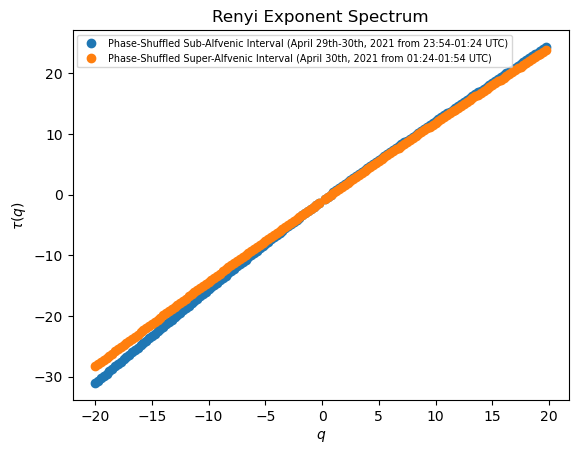

In [36]:
# Now find and plot the Renyi exponent spectrum from the Hurst spectrum:
tauFunc_pshuf1=MFDFAlib.renyiExp(qList,h_pshuf1)
tauFunc_pshuf2=MFDFAlib.renyiExp(qList,h_pshuf2)
########PLOTTING#################
plt.plot(qList,tauFunc_pshuf1,'o',label = f'Phase-Shuffled {sub_label}')
plt.plot(qList,tauFunc_pshuf2,'o', label = f'Phase-Shuffled {super_label}')
plt.xlabel(r'$q$')
plt.ylabel(r'$\tau(q)$')
plt.legend(fontsize = 'x-small')
plt.title('Renyi Exponent Spectrum')
plt.show()
#################################

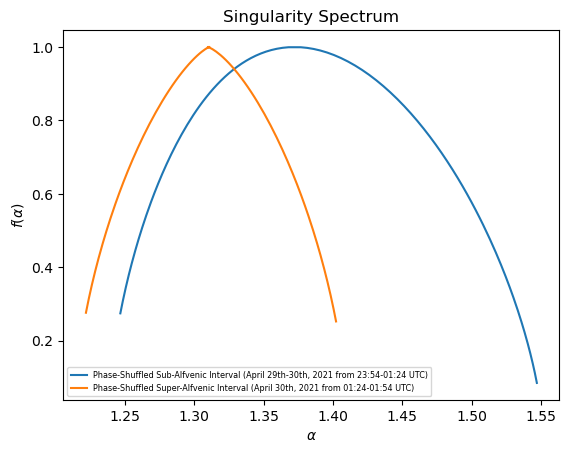

In [37]:
# Finally, from the Renyi exponents, find and plot the multifractal spectra:
alphaList_pshuf1, mfList_pshuf1 = MFDFAlib.mfSpec(tauFunc_pshuf1, qList)
alphaList_pshuf2, mfList_pshuf2 = MFDFAlib.mfSpec(tauFunc_pshuf2, qList)
#######PLOTTING##################
# Finally, plot the f(alpha) function
plt.plot(alphaList_pshuf1, mfList_pshuf1, label = f'Phase-Shuffled {sub_label}')
plt.plot(alphaList_pshuf2, mfList_pshuf2, label = f'Phase-Shuffled {super_label}')
plt.title('Singularity Spectrum')
plt.legend(fontsize = "xx-small")
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$f(\alpha)$')
plt.show()
#################################

## Differenced Series

In [38]:
# First difference the series:
diff_sub = MFDFAlib.difference(bmag_sub)
diff_super = MFDFAlib.difference(bmag_super)


In [39]:
# We first need to select a band of lags, varying from small segments of data to long ones:
# These bands must be integers, since they will segment the data into chunks of side length s:
lag1 = np.arange(2,len(diff_sub)//2,10)
lag2 = np.arange(2,len(diff_super)//2,10)
#lag1 = np.unique(np.logspace(0.5, 5, 100, dtype=int))
#lag2 = np.unique(np.logspace(0.5, 5, 100, dtype=int))
# We need to select a range of powers for the fluctuation function.
# Gomes et al. do -20 to 20 with increments of 0.25
qList=np.arange(-20,20,0.25).tolist()
qList.remove(0)

#The order for the polynomial fitting is chosen by Gomes et al. as 3:
order = 2

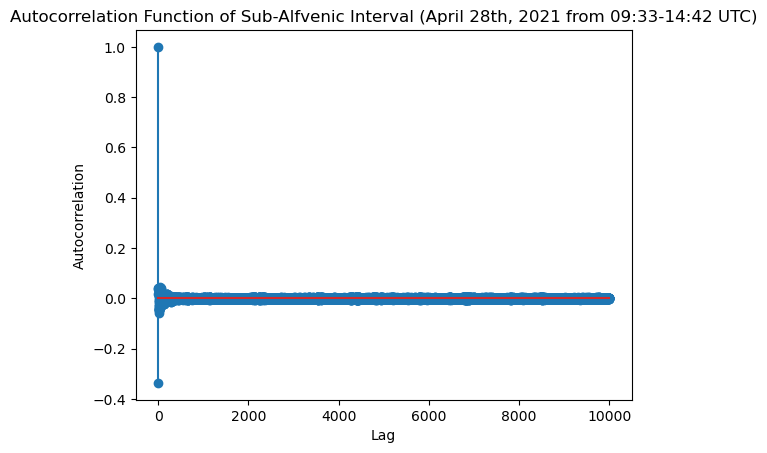

In [40]:
# Calculate the autocorrelation function using statsmodels library
acf = sm.tsa.acf(diff_sub, nlags = 10000)
plt.stem(range(len(acf)), acf)
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.title("Autocorrelation Function of Sub-Alfvenic Interval (April 28th, 2021 from 09:33-14:42 UTC)")
plt.show()

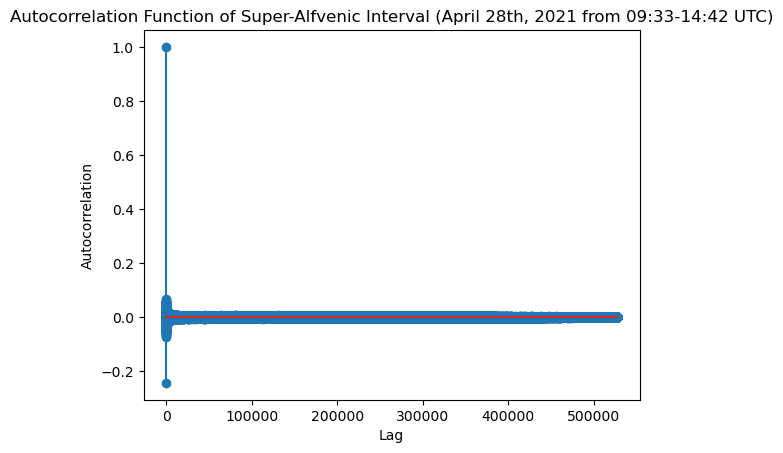

In [41]:
# Calculate the autocorrelation function using statsmodels library
acf = sm.tsa.acf(diff_super, nlags = len(diff_super))
plt.stem(range(len(acf)), acf)
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.title("Autocorrelation Function of Super-Alfvenic Interval (April 28th, 2021 from 09:33-14:42 UTC)")
plt.show()

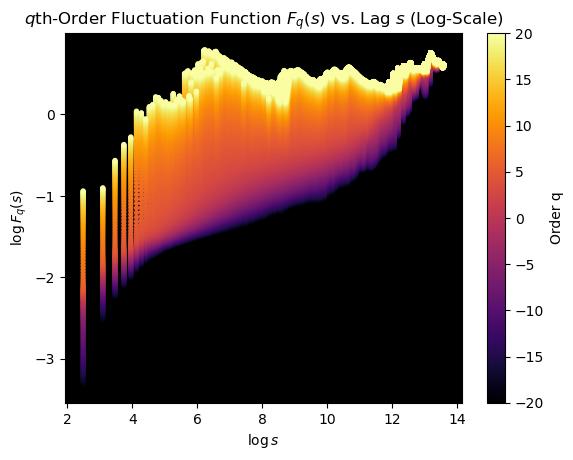

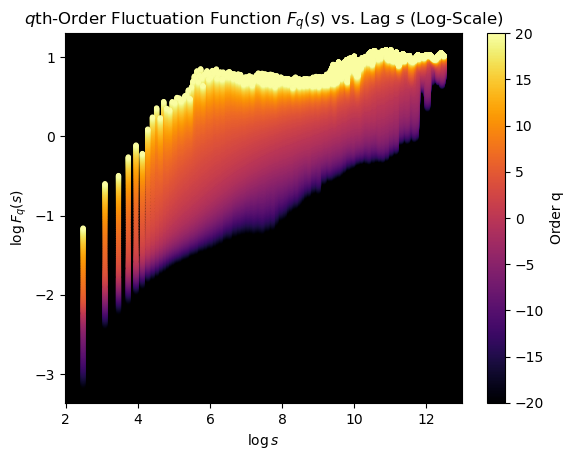

In [42]:
# Find the fluctuation function:
lag1,dfaList1_diff = MFDFAlib.flucFunc(diff_sub,lag1,qList,order)
lag2,dfaList2_diff = MFDFAlib.flucFunc(diff_super,lag2,qList,order)

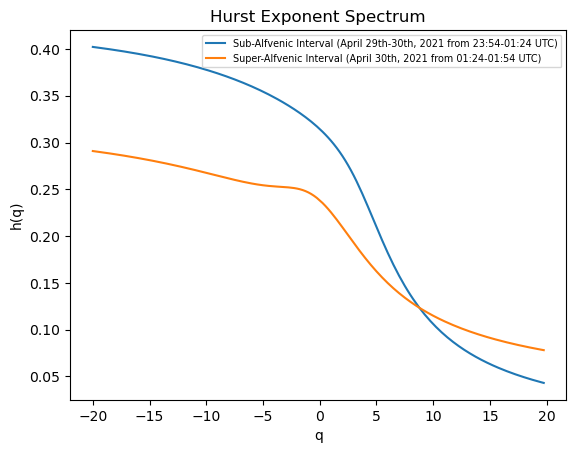

In [43]:
"""
 Hurst parameter spectra from each fluctuation function:
 Note : hList takes in the transpose of the fluctuation matrix,
 which is of the form: [[F_q1(s1),F_q1(s2), ...], [F_q2(s1),F_q2(s2), ...]]
 for the purpose of easily parsing the data  
"""
h1_diff=MFDFAlib.hList(lag1,dfaList1_diff.T)
h2_diff=MFDFAlib.hList(lag2,dfaList2_diff.T)
########PLOTTING#################
plt.plot(qList,h1_diff,label=sub_label)
plt.plot(qList,h2_diff,label=super_label)
plt.ylabel('h(q)')
plt.xlabel('q')
plt.legend(fontsize = 'x-small')
plt.title('Hurst Exponent Spectrum')
plt.show()
#################################

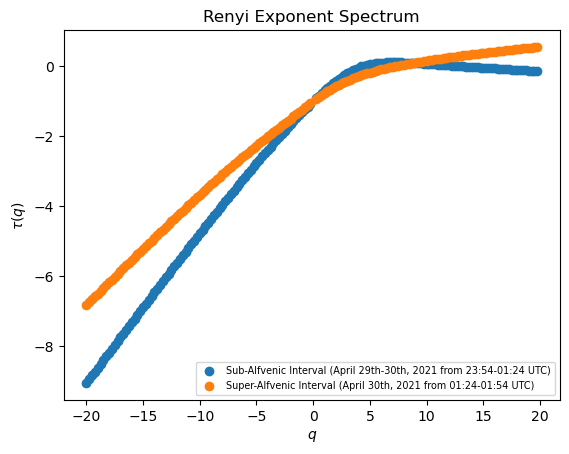

In [44]:
# Now find and plot the Renyi exponent spectrum from the Hurst spectrum:
tauFunc1_diff=MFDFAlib.renyiExp(qList,h1_diff)
tauFunc2_diff=MFDFAlib.renyiExp(qList,h2_diff)
########PLOTTING#################
plt.plot(qList,tauFunc1_diff,'o',label = sub_label)
plt.plot(qList,tauFunc2_diff,'o', label = super_label)
plt.xlabel(r'$q$')
plt.ylabel(r'$\tau(q)$')
plt.legend(fontsize = 'x-small')
plt.title('Renyi Exponent Spectrum')
plt.show()
#################################

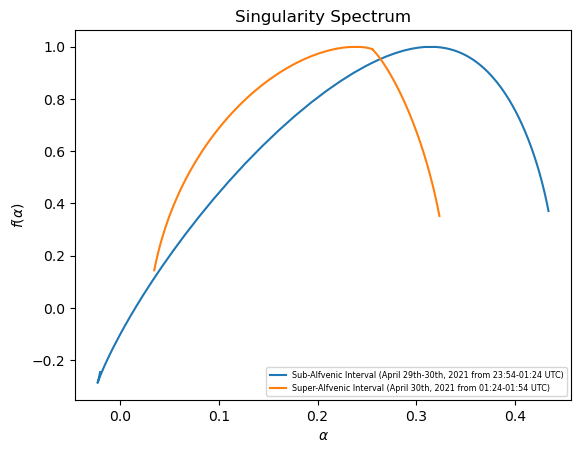

In [45]:
# Finally, from the Renyi exponents, find and plot the multifractal spectra:
alphaList1_diff, mfList1_diff = MFDFAlib.mfSpec(tauFunc1_diff, qList)
alphaList2_diff, mfList2_diff = MFDFAlib.mfSpec(tauFunc2_diff, qList)
#######PLOTTING##################
# Finally, plot the f(alpha) function
plt.plot(alphaList1_diff, mfList1_diff, label = sub_label)
plt.plot(alphaList2_diff, mfList2_diff, label = super_label)
plt.title('Singularity Spectrum')
plt.legend(fontsize = "xx-small")
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$f(\alpha)$')
plt.show()
#################################

### Full Domain Plot: 

23-Apr-25 19:29:10: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/psp/fields/l2/mag_rtn/2021/
23-Apr-25 19:29:11: File is current: psp_data/fields/l2/mag_rtn/2021/psp_fld_l2_mag_rtn_2021042800_v02.cdf
23-Apr-25 19:29:11: File is current: psp_data/fields/l2/mag_rtn/2021/psp_fld_l2_mag_rtn_2021042806_v02.cdf
23-Apr-25 19:29:12: File is current: psp_data/fields/l2/mag_rtn/2021/psp_fld_l2_mag_rtn_2021042812_v02.cdf
23-Apr-25 19:29:12: File is current: psp_data/fields/l2/mag_rtn/2021/psp_fld_l2_mag_rtn_2021042818_v02.cdf
23-Apr-25 19:29:12: File is current: psp_data/fields/l2/mag_rtn/2021/psp_fld_l2_mag_rtn_2021042900_v02.cdf
23-Apr-25 19:29:12: File is current: psp_data/fields/l2/mag_rtn/2021/psp_fld_l2_mag_rtn_2021042906_v02.cdf
23-Apr-25 19:29:13: File is current: psp_data/fields/l2/mag_rtn/2021/psp_fld_l2_mag_rtn_2021042912_v02.cdf
23-Apr-25 19:29:13: File is current: psp_data/fields/l2/mag_rtn/2021/psp_fld_l2_mag_rtn_2021042918_v02.cdf
23-Apr-25 19:29:35: Downloading re

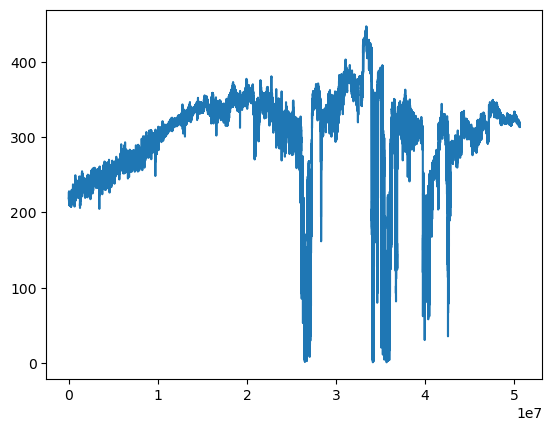

In [46]:
# Now let's choose the total time range to make sure we are plotting the right thing
totalTimeRange = ['2021-4-28/00:00','2021-4-30']

fields_vars = pyspedas.projects.psp.fields(trange=totalTimeRange, datatype='mag_rtn', level='l2', time_clip=True)
b_rtn_tot = pyspedas.get_data("psp_fld_l2_mag_RTN")
b_mag_tot = MFDFAlib.magnitude(b_rtn_tot.y)

#tplot('psp_fld_l2_mag_RTN')
plt.plot(b_mag_tot)